In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv"
df = pd.read_csv(url)

In [3]:
# Data Preprocessing
df.dropna(inplace=True)  


In [4]:
# Feature and Target Variables
# Selecting the correct column names
X = df[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']]

y = df['Happiness Score']

In [5]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Model Training and Evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}


In [7]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {"MAE": mae, "MSE": mse, "R2": r2}


In [8]:
# Display the results
results_df = pd.DataFrame(results).T
print(results_df)


                        MAE       MSE        R2
Linear Regression  0.402305  0.241939  0.829471
Random Forest      0.425378  0.262696  0.814840


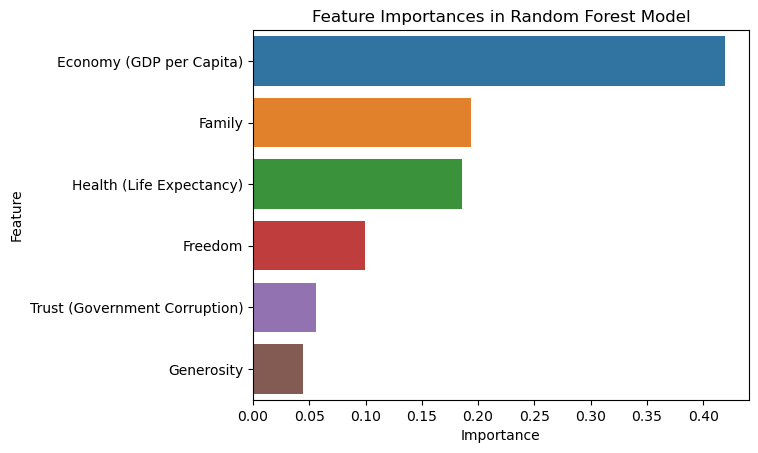

In [9]:
# Feature Importance for Random Forest
if "Random Forest" in models:
    rf_model = models["Random Forest"]
    feature_importances = rf_model.feature_importances_
    features = X.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot Feature Importances
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title('Feature Importances in Random Forest Model')
    plt.show()

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [11]:
# Step 1: Data Understanding and Exploration

# Load the dataset
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv"
df = pd.read_csv(url)


In [12]:
# Inspect the dataset
print(df.head())
print(df.info())
print(df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [13]:
# Step 2: Data Preprocessing

# Handling missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(columns=['Cabin', 'Ticket'])  # Dropping columns with too many missing values or irrelevant


In [14]:
# Encoding categorical features
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [15]:
# Feature Engineering (if necessary)
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1


In [16]:
# Dropping non-numeric or less useful columns
df = df.drop(columns=['Name', 'PassengerId'])

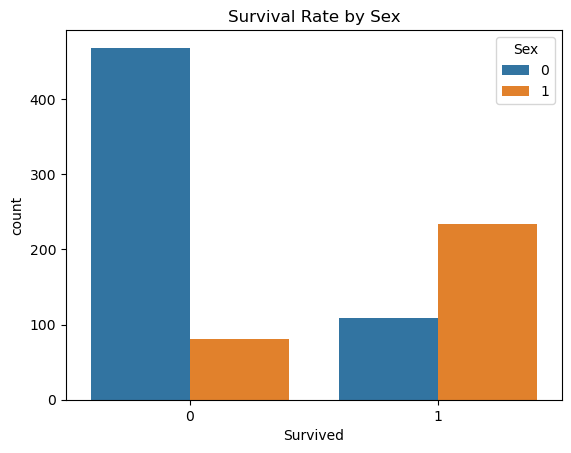

In [17]:
# Step 3: Exploratory Data Analysis (EDA)

# Visualizing survival rate by sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Rate by Sex')
plt.show()

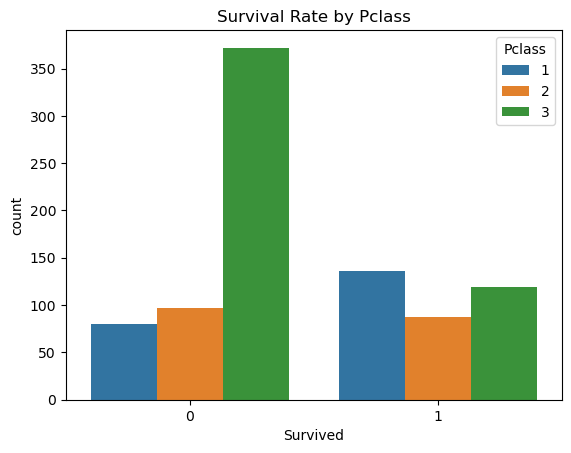

In [18]:
# Visualizing survival rate by Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Rate by Pclass')
plt.show()

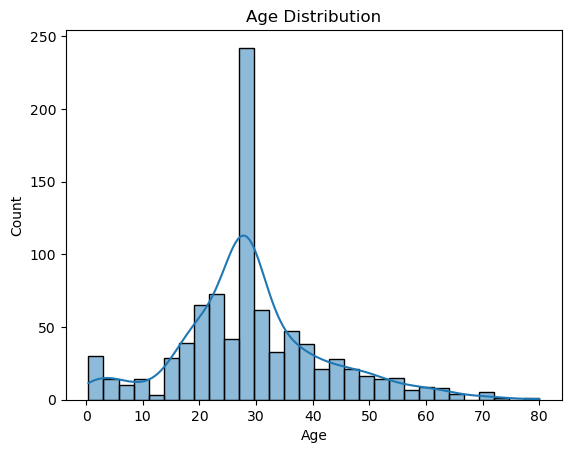

In [19]:
# Visualizing age distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


In [20]:
# Step 4: Model Building

# Splitting the dataset
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Training models
logreg = LogisticRegression(max_iter=200)
rf = RandomForestClassifier(n_estimators=100)

logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)


C:\Users\banja\anaconda3\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [22]:
# Step 5: Model Evaluation and Selection

# Evaluating Logistic Regression
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(f"Precision: {precision_score(y_test, y_pred_logreg)}")
print(f"Recall: {recall_score(y_test, y_pred_logreg)}")
print(f"F1 Score: {f1_score(y_test, y_pred_logreg)}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_logreg)}")


Logistic Regression Performance:
Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC-AUC: 0.8001930501930502


In [23]:
# Evaluating Random Forest
y_pred_rf = rf.predict(X_test)
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf)}")
print(f"Recall: {recall_score(y_test, y_pred_rf)}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf)}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_rf)}")


Random Forest Performance:
Accuracy: 0.8268156424581006
Precision: 0.7945205479452054
Recall: 0.7837837837837838
F1 Score: 0.7891156462585033
ROC-AUC: 0.8204633204633205


In [24]:
# Step 6: Model Testing

# Assuming Random Forest performs better
final_model = rf


In [25]:
# Testing on unseen data
y_test_pred = final_model.predict(X_test)
print(f"Final Model Accuracy: {accuracy_score(y_test, y_test_pred)}")


Final Model Accuracy: 0.8268156424581006


In [26]:
# Step 7: Conclusion and Insights

# Conclusion and insights can be added here as comments or printed statements based on the analysis and model evaluation
print("Summary of findings:")
print("1. Gender is a significant factor in survival prediction, with females having a higher survival rate.")
print("2. Passenger class also plays a critical role, with higher classes having better survival rates.")
print("3. Age distribution shows that younger passengers had higher survival rates.")
print("4. Random Forest Classifier performed better than Logistic Regression in this case.")


Summary of findings:
1. Gender is a significant factor in survival prediction, with females having a higher survival rate.
2. Passenger class also plays a critical role, with higher classes having better survival rates.
3. Age distribution shows that younger passengers had higher survival rates.
4. Random Forest Classifier performed better than Logistic Regression in this case.
